### Starbucks Drink Menu Analysis
* [Introduction and Questions](#Intro)
* [Packages](#Packages)
* [Load Data](#Load_Data)
* [Initial Exploration](#Initial_Exp)
* [Little Bit of Data Wranglin](#Data_Wrangling)
* [Exploratory Data Analysis](#EDA)

Target Auidience: Customers/Consumers, informational

## Introduction and Questions <a id='Intro'> </a>

Starbucks allows for a wide range of customization for all of their drinks. But beyond what flavor combination you would want to create, what are you gaining or losing out on with each sip? How do the beverage catagories compare to one another? If taking into condsideration nutrient values for weight watching, how should you rank the beverage catagories to avoid?

## Packages <a id='Packages'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

## Load Data <a id='Load_Data'></a>

In [2]:
dataset = pd.read_csv("starbucks_drinkMenu_expanded.csv")

## Initial Exploration <a id='Initial_Exp'></a>

In [3]:
dataset.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Beverage_category,Coffee,Coffee,Coffee,Coffee,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks,Classic Espresso Drinks
Beverage,Brewed Coffee,Brewed Coffee,Brewed Coffee,Brewed Coffee,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Latte,Caffè Mocha (Without Whipped Cream),Caffè Mocha (Without Whipped Cream),Caffè Mocha (Without Whipped Cream),Caffè Mocha (Without Whipped Cream)
Beverage_prep,Short,Tall,Grande,Venti,Short Nonfat Milk,2% Milk,Soymilk,Tall Nonfat Milk,2% Milk,Soymilk,Grande Nonfat Milk,2% Milk,Soymilk,Venti Nonfat Milk,2% Milk,Soymilk,Short Nonfat Milk,2% Milk,Soymilk,Tall Nonfat Milk
Calories,3,4,5,5,70,100,70,100,150,110,130,190,150,170,240,190,110,130,110,170
Total Fat (g),0.1,0.1,0.1,0.1,0.1,3.5,2.5,0.2,6,4.5,0.3,7,5,0.4,9,7,1.5,4,3.5,2
Trans Fat (g),0.0,0.0,0.0,0.0,0.1,2.0,0.4,0.2,3.0,0.5,0.2,3.5,0.5,0.3,4.5,1.0,1.0,2.0,1.0,1.0
Saturated Fat (g),0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.3,0.0,0.0,0.1,0.0,0.0
Sodium (mg),0,0,0,0,5,15,0,5,25,0,5,30,0,10,35,0,5,10,0,5
Total Carbohydrates (g),5,10,10,10,75,85,65,120,135,105,150,170,130,190,220,170,60,70,55,100
Cholesterol (mg),0,0,0,0,10,10,6,15,15,10,19,19,13,25,24,16,21,21,19,32


In [4]:
dataset.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [6]:
missing_data = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Caffeine (mg),1,0.413223
Beverage,0,0.000000
Iron (% DV),0,0.000000
Calcium (% DV),0,0.000000
Vitamin C (% DV),0,0.000000
Vitamin A (% DV),0,0.000000
Protein (g),0,0.000000
Sugars (g),0,0.000000
Dietary Fibre (g),0,0.000000
Beverage_category,0,0.000000


In [7]:
dataset[dataset["Caffeine (mg)"].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


Only 1 missing data that could be ignore during the EDA, but the dataset requires some data wrangling for easier and cleaner processing.

## Little Bit of Data Wrangling <a id='Data_Wrangling'> </a>

In [8]:
def uniqueChecker(col):
    return dataset[col].unique()

In [9]:
for col in dataset.columns:
    print(col, uniqueChecker(col), "\n")

Beverage_category ['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème'] 

Beverage ['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Bana

In [10]:
# Remove all the white spaces in the column names
dataset.columns = dataset.columns.str.replace(' ', '')
dataset.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)',
       'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)',
       'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 'VitaminC(%DV)',
       'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)'],
      dtype='object')

#### TotalFat(g)

There is a '3 2' that looks to be 3.2 in context with the other values.

In [11]:
dataset["TotalFat(g)"].value_counts()

0.1    34
0      21
1.5    16
5      15
3      15
4      14
0.2    14
1      13
2.5    13
6      13
3.5    12
7      10
2      10
4.5     9
0.3     6
8       6
9       6
0.5     4
11      3
10      3
0.4     2
15      1
13      1
3 2     1
Name: TotalFat(g), dtype: int64

In [12]:
dataset["TotalFat(g)"].replace('3 2', 3.2, inplace=True)

In [13]:
dataset["TotalFat(g)"].value_counts()

0.1    34
0      21
1.5    16
5      15
3      15
4      14
0.2    14
1      13
2.5    13
6      13
3.5    12
7      10
2      10
4.5     9
0.3     6
8       6
9       6
0.5     4
11      3
10      3
0.4     2
15      1
13      1
3.2     1
Name: TotalFat(g), dtype: int64

#### VitaminA(%DV), VitaminC(%DV), Calcium(%DV), Iron(%DV)

% values needs to be removed from the numerical values.

In [14]:
cols = ['VitaminA(%DV)', 'VitaminC(%DV)', 'Calcium(%DV)', 'Iron(%DV)']


dataset[cols] = dataset[cols].apply(lambda x: x.str.rstrip('%'))
dataset[cols]

,VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,2,0
4,10,0,20,0
...,...,...,...,...
237,6,8,20,10
238,6,0,10,0
239,6,0,10,0
240,4,0,10,6


#### Caffeine(mg)

Need to convert the varies to nan, since they do not specify a value. Could find the value online, but this is more focused on story telling then data wrangling.

In [15]:
dataset["Caffeine(mg)"].replace("Varies", np.NaN, inplace=True)
dataset["Caffeine(mg)"].replace("varies", np.NaN, inplace=True)

In [16]:
dataset["Caffeine(mg)"].value_counts(dropna=False)

75     37
0      35
150    34
NaN    23
70     14
95     11
110     9
130     7
120     6
25      6
90      4
175     4
125     3
55      3
15      3
140     3
100     3
80      3
145     3
170     3
50      3
30      3
20      3
10      3
180     3
85      3
165     2
260     1
235     1
300     1
225     1
410     1
330     1
65      1
105     1
Name: Caffeine(mg), dtype: int64

#### Finishing up Tidying

In [17]:
# Columns to convert to numerical
cols = list(set(dataset.columns) - set(['Beverage_category', 'Beverage', 'Beverage_prep']))
cols

['Calories',
 'TransFat(g)',
 'SaturatedFat(g)',
 'Sodium(mg)',
 'Cholesterol(mg)',
 'Sugars(g)',
 'VitaminA(%DV)',
 'Caffeine(mg)',
 'TotalFat(g)',
 'Protein(g)',
 'TotalCarbohydrates(g)',
 'DietaryFibre(g)',
 'Calcium(%DV)',
 'VitaminC(%DV)',
 'Iron(%DV)']

In [18]:
dataset[cols] = dataset[cols].astype("float64")

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      242 non-null    object 
 1   Beverage               242 non-null    object 
 2   Beverage_prep          242 non-null    object 
 3   Calories               242 non-null    float64
 4   TotalFat(g)            242 non-null    float64
 5   TransFat(g)            242 non-null    float64
 6   SaturatedFat(g)        242 non-null    float64
 7   Sodium(mg)             242 non-null    float64
 8   TotalCarbohydrates(g)  242 non-null    float64
 9   Cholesterol(mg)        242 non-null    float64
 10  DietaryFibre(g)        242 non-null    float64
 11  Sugars(g)              242 non-null    float64
 12  Protein(g)             242 non-null    float64
 13  VitaminA(%DV)          242 non-null    float64
 14  VitaminC(%DV)          242 non-null    float64
 15  Calciu

## Exploratory Data Anyalsis <a id='EDA'> </a>

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64


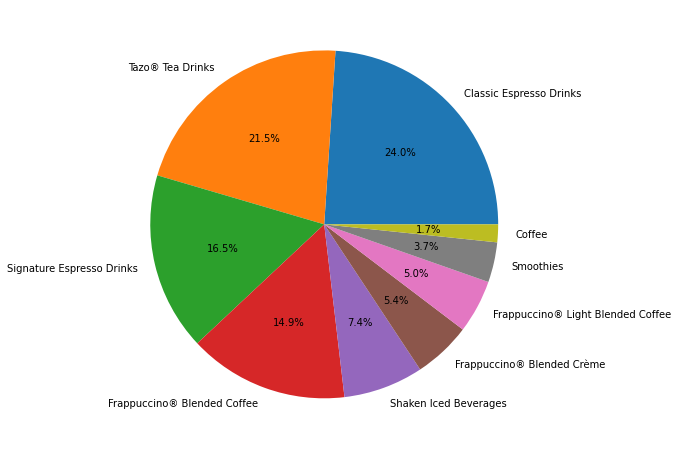

In [20]:
# Distribution of Baseline Customization
BevCat_counts = dataset.Beverage_category.value_counts()
print(BevCat_counts)

plt.figure(figsize=(8,8))

mylab = BevCat_counts.index

plt.pie(BevCat_counts, labels=mylab, autopct='%1.1f%%')
plt.show()

It looks like Starbucks has the most baseline customization in their classic expresso drinks and tazo tea drinks.

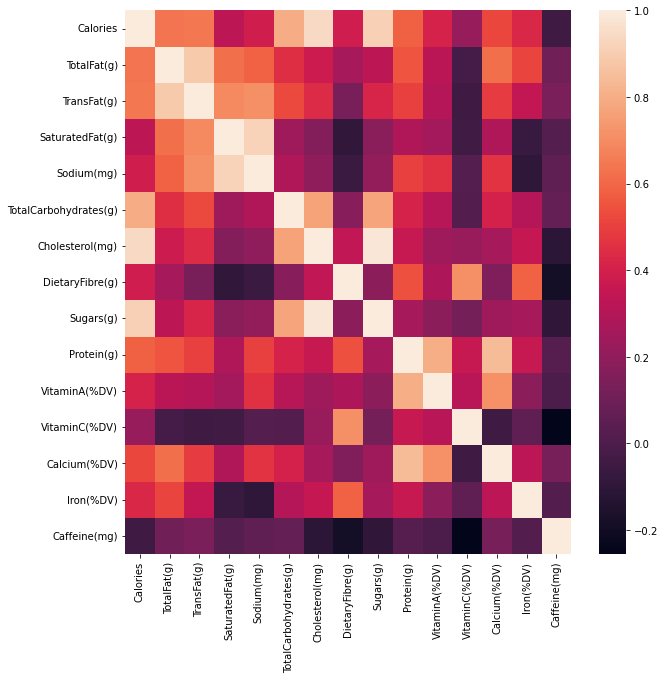

In [21]:
# Heatmap Plot of Correlation between Features
plt.figure(figsize=(10,10))

sns.heatmap(dataset.corr())
plt.show()

The care for nutritional values are usually associated with weight loss. There are the usual nutrients that are watched for such as calories, cholesterol, sugars, protein, total fat, trans fat, saturated fat... etc. But given the heatmap shown above and the correlations assocated between certain features, the observed list can actually be narrowed down in this case. This means that when observing and comparing calories, sugars, and cholesterol in the drinks, you can just compare the calories, since sugars and cholesterol are postively correlated with calories.

The features to compare and explore are:
* Calories
* Total Fat
* Dietary Fibre
* Protein
* Caffeine - not nutritional related feature, but starbucks is associated with getting caffeine. 

In [22]:
# Beverage_prep was not selected since these are the sizes and different add on that are not the base beverage.
selectCol = ["Beverage_category", "Beverage", "Calories", "TotalFat(g)", "DietaryFibre(g)", "Protein(g)", "Caffeine(mg)"]

selectedData = dataset[selectCol]
selectedData.head()

,Beverage_category,Beverage,Calories,TotalFat(g),DietaryFibre(g),Protein(g),Caffeine(mg)
0,Coffee,Brewed Coffee,3.0,0.1,0.0,0.3,175.0
1,Coffee,Brewed Coffee,4.0,0.1,0.0,0.5,260.0
2,Coffee,Brewed Coffee,5.0,0.1,0.0,1.0,330.0
3,Coffee,Brewed Coffee,5.0,0.1,0.0,1.0,410.0
4,Classic Espresso Drinks,Caffè Latte,70.0,0.1,0.0,6.0,75.0


In [23]:
def avg_barplotFunc(BevGroup, Feature):
    avg_temp_df = pd.DataFrame(selectedData.groupby(BevGroup)[Feature].mean())
    avg_temp_df.sort_values(by=Feature, ascending=True, inplace=True)
    
    plt.barh(avg_temp_df.index, avg_temp_df[Feature])
    plt.xlabel(f"Average {Feature}")
    plt.title(f"Average {Feature} within {BevGroup}")
    plt.show()

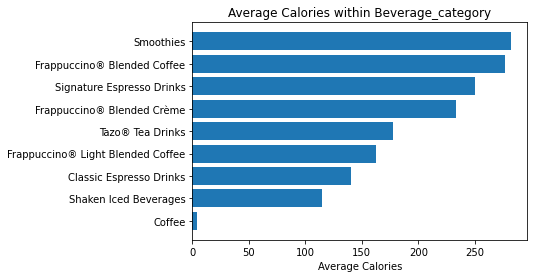

In [24]:
avg_barplotFunc("Beverage_category", "Calories")

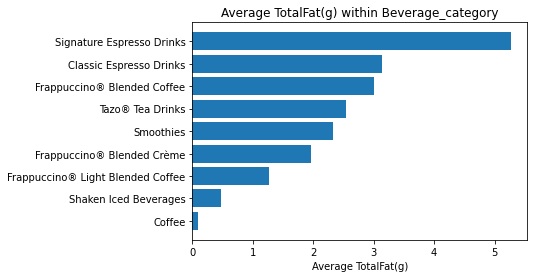

In [25]:
avg_barplotFunc("Beverage_category", "TotalFat(g)")

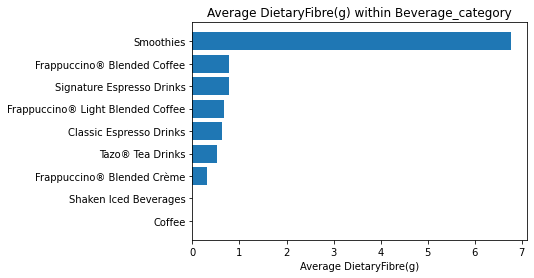

In [26]:
avg_barplotFunc("Beverage_category", "DietaryFibre(g)")

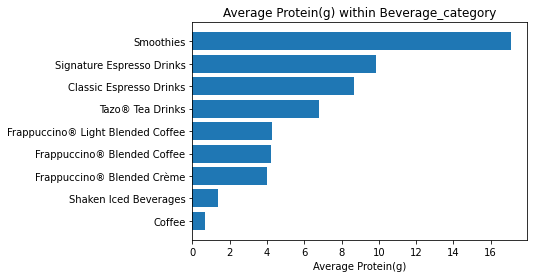

In [27]:
avg_barplotFunc("Beverage_category", "Protein(g)")

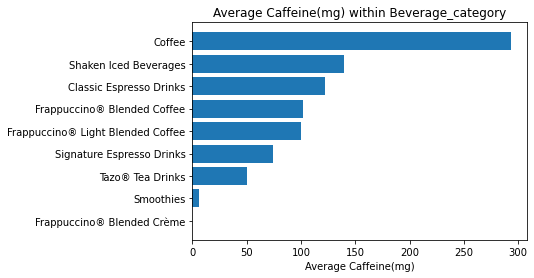

In [28]:
avg_barplotFunc("Beverage_category", "Caffeine(mg)")

In terms of average nutrients, smoothies have the highest amount among all of the beverage groups, especially seen in dietary fibre. This is most likely due to the fact that smoothies are made with fruits, that are naturally high in these areas without the need of additivies. If you're looking for just the caffeine boost, coffee is the way to go. But if you want a little be more flavor while maximizing caffeine, the next best thing would be shaken iced beverages or classic expresso drinks.